In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


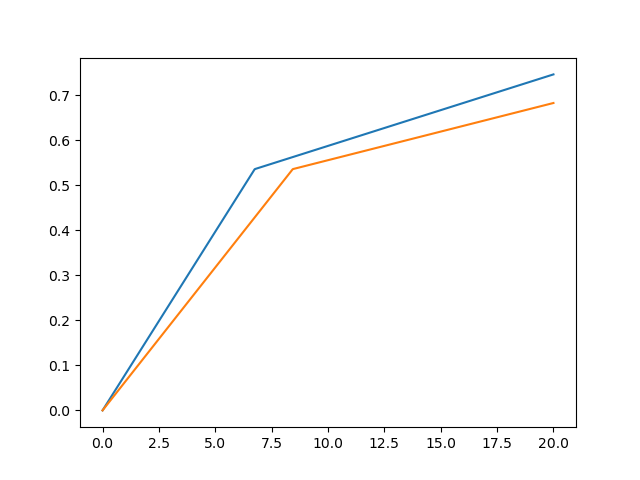

In [52]:
exposure_tot = 10 #ms
exp_kp1 = 2 #ms

Vhigh = 127
Vlow = 64

Vtfl2 = 100


def model(x, rate):
    kp1_ms = exposure_tot - exp_kp1
    before_kneepoint = np.clip(Vhigh - x * rate, Vtfl2, Vhigh)
    at_kp = np.clip(Vhigh - kp1_ms * rate, Vtfl2, Vhigh)
    after_kneepoint = np.clip(at_kp - (x - kp1_ms) * rate, Vlow, Vhigh)
    return np.where(x < kp1_ms, before_kneepoint, after_kneepoint)

def at_end(rate, tot=exposure_tot, kp1=exp_kp1):
    kp1_ms = tot - kp1
    at_kp = np.clip(Vhigh - kp1_ms * rate, Vtfl2, Vhigh)
    at_end = np.clip(at_kp - kp1 * rate, Vlow, Vhigh)
    return at_end

def norm(v):
    return 1.0 - (v - Vlow) / (Vhigh - Vlow)
    
plt.figure()
total_exposure = np.linspace(0, 20, 1000)
kp1 = total_exposure * 0.2
plt.plot(total_exposure, norm(at_end(5, total_exposure, kp1)))
plt.plot(total_exposure, norm(at_end(4, total_exposure, kp1)))